In [46]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
# sp500 = yf.Ticker("^GSPC") ## S&P-500
sp500 = yf.Ticker("^IXIC") ## NASDAQ

startDate = "2000-01-01"
endDate = "2024-01-01"

df = sp500.history(interval="1d", start=startDate, end=endDate)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,0.0,0.0
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,0.0,0.0
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,0.0,0.0
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,0.0,0.0
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,0.0,0.0
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,0.0,0.0
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,0.0,0.0


In [48]:
# Drop Dividends column
df.drop(columns=['Dividends'], inplace=True)

# Drop Stock Splits column
df.drop(columns=['Stock Splits'], inplace=True)

In [49]:
## Calculate Simple Moving Average (SWA) using rolling mean.
df['SMA'] = df['Close'].rolling(window=14).mean()

## Calculate EMA-12 and EMA-26 using Exponential Weighing Average (EWM)
df['EMA-12'] = df['Close'].ewm(span = 12, adjust = False).mean()
df['EMA-26'] = df['Close'].ewm(span = 26, adjust = False).mean()

## Calculate MACD 
df['MACD'] = df['EMA-12'] - df['EMA-26']

In [50]:
df

,Open,High,Low,Close,Volume,SMA,EMA-12,EMA-26,MACD
Date,,,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,NaN,4131.149902,4131.149902,0.000000
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,NaN,4095.848370,4114.152868,-18.304498
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,NaN,4062.262473,4096.625992,-34.363519
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,NaN,4010.703613,4069.255910,-58.552297
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,NaN,3990.998460,4055.431036,-64.432577
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,14645.622838,14739.929221,14454.702384,285.226836
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,14705.955706,14791.412465,14500.618527,290.793938
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,14773.989258,14838.761269,14544.956391,293.804878


In [51]:
## Calculate RSI using formula
## RSI = 100 – [100 ÷ ( 1 + (Average Gain During Up Periods ÷ Average Loss During Down Periods ))]

delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

In [52]:
df

,Open,High,Low,Close,Volume,SMA,EMA-12,EMA-26,MACD,RSI
Date,,,,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,NaN,4131.149902,4131.149902,0.000000,NaN
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,NaN,4095.848370,4114.152868,-18.304498,NaN
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,NaN,4062.262473,4096.625992,-34.363519,NaN
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,NaN,4010.703613,4069.255910,-58.552297,NaN
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,NaN,3990.998460,4055.431036,-64.432577,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,14645.622838,14739.929221,14454.702384,285.226836,78.343783
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,14705.955706,14791.412465,14500.618527,290.793938,78.894673
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,14773.989258,14838.761269,14544.956391,293.804878,83.943354


In [53]:
# Create target variable: 1 if next day's close is higher than today's, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [54]:
df['PriceDiff'] = df['Close'].diff()
df

,Open,High,Low,Close,Volume,SMA,EMA-12,EMA-26,MACD,RSI,Target,PriceDiff
Date,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,NaN,4131.149902,4131.149902,0.000000,NaN,0,NaN
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,NaN,4095.848370,4114.152868,-18.304498,NaN,0,-229.459961
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,NaN,4062.262473,4096.625992,-34.363519,NaN,0,-24.149902
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,NaN,4010.703613,4069.255910,-58.552297,NaN,1,-150.410156
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,NaN,3990.998460,4055.431036,-64.432577,NaN,1,155.490234
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,14645.622838,14739.929221,14454.702384,285.226836,78.343783,1,29.099609
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,14705.955706,14791.412465,14500.618527,290.793938,78.894673,1,81.600586
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,14773.989258,14838.761269,14544.956391,293.804878,83.943354,0,24.609375


In [55]:
# Fetch VIX index data
vix = yf.Ticker("^VIX")
vix_df = vix.history(interval="1d", start=startDate, end=endDate)


df.index = df.index.tz_convert('UTC')
vix_df.index = vix_df.index.tz_convert('UTC')

# Shift the timestamps of vix_df by one hour
vix_df.index = vix_df.index - pd.Timedelta(hours=1)
# Merge VIX close prices into the original DataFrame
# df['VIX'] = vix_df['Close']

df = df.join(vix_df[['Close']], rsuffix='_VIX')

# Rename the VIX close column
df.rename(columns={'Close_VIX': 'VIX'}, inplace=True)

vix_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 05:00:00+00:00,24.360001,26.150000,23.980000,24.209999,0,0.0,0.0
2000-01-04 05:00:00+00:00,24.940001,27.180000,24.799999,27.010000,0,0.0,0.0
2000-01-05 05:00:00+00:00,27.980000,29.000000,25.850000,26.410000,0,0.0,0.0
2000-01-06 05:00:00+00:00,26.680000,26.709999,24.700001,25.730000,0,0.0,0.0
2000-01-07 05:00:00+00:00,25.139999,25.170000,21.719999,21.719999,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 05:00:00+00:00,13.720000,13.960000,13.000000,13.030000,0,0.0,0.0
2023-12-26 05:00:00+00:00,13.770000,13.800000,12.960000,12.990000,0,0.0,0.0
2023-12-27 05:00:00+00:00,13.020000,13.040000,12.370000,12.430000,0,0.0,0.0


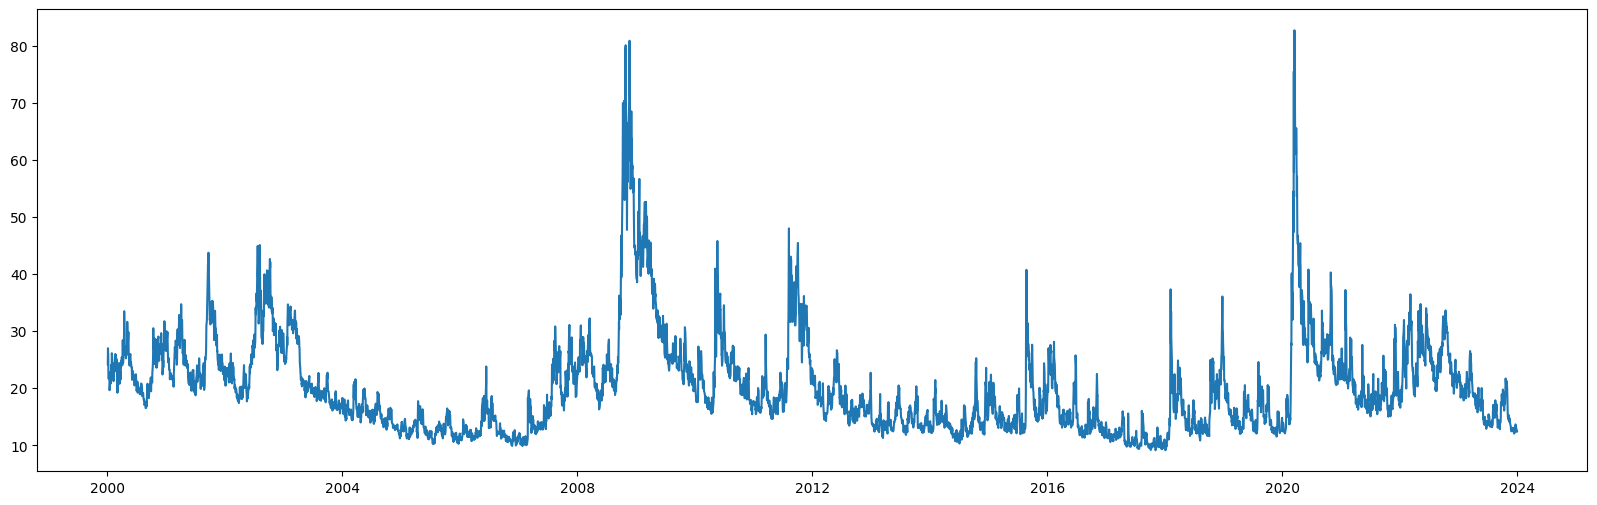

In [56]:
plt.figure(figsize=(20,6))
plt.plot(vix_df['Close'])

# plt.legend()
plt.show()

In [57]:
# Remove any row with NaN value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,EMA-12,EMA-26,MACD,RSI,Target,PriceDiff,VIX
Date,,,,,,,,,,,,,
2000-01-21 05:00:00+00:00,4236.649902,4238.000000,4168.299805,4235.399902,1923680000,4004.964251,4079.727545,4068.386767,11.340778,53.974184,0,45.890137,20.820000
2000-01-24 05:00:00+00:00,4290.379883,4303.149902,4095.310059,4096.080078,1989050000,4002.459263,4082.243319,4070.438123,11.805196,48.791454,1,-139.319824,24.070000
2000-01-25 05:00:00+00:00,4124.750000,4167.629883,4028.510010,4167.410156,1743630000,4021.439279,4095.345910,4077.621237,17.724673,60.277087,0,71.330078,23.020000
2000-01-26 05:00:00+00:00,4174.720215,4174.720215,4069.909912,4069.909912,1717000000,4035.179984,4091.432679,4077.050027,14.382652,57.040686,0,-97.500244,23.030001
2000-01-27 05:00:00+00:00,4120.500000,4140.089844,3973.590088,4039.560059,1798460000,4057.496425,4083.452276,4074.272993,9.179283,62.536624,0,-30.349854,23.540001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 05:00:00+00:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,14645.622838,14739.929221,14454.702384,285.226836,78.343783,1,29.099609,13.030000
2023-12-26 05:00:00+00:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,14705.955706,14791.412465,14500.618527,290.793938,78.894673,1,81.600586,12.990000
2023-12-27 05:00:00+00:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,14773.989258,14838.761269,14544.956391,293.804878,83.943354,0,24.609375,12.430000


In [58]:
# Select features and target
features = ['SMA', 'MACD', 'RSI', 'VIX']
X = df[features]
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model

model = RandomForestClassifier(
                                n_estimators=21,
                                # n_estimators=5,
                                max_depth=3, 
                                # max_features=2, # Sqrt(n_features) 
                                random_state=42
                                )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Train score :", model.score(X_train, y_train))
print("Test score :", model.score(X_test, y_test))

Model Accuracy: 0.53
Train score : 0.5667150861174518
Test score : 0.5327800829875519


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features and target
features = ['SMA', 'MACD', 'RSI', 'VIX']
X = df[features]
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


if (False):
    # Define the range of n_estimators to explore
    estimator_range = range(10, 210, 10)  # Adjust the range as needed

    # Loop through the range of n_estimators
    for n_estimators in estimator_range:
        # Train the model
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Number of Estimators: {n_estimators}, Model Accuracy: {accuracy:.5f}")

        # Optionally, print train and test scores
        # print("Train score :", model.score(X_train, y_train))
        # print("Test score :", model.score(X_test, y_test))
